In [89]:
import os 
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from io import BytesIO
from ipywidgets import widgets

In [90]:
BASE_DIR='data'

print(f"Base Directory: {os.listdir(BASE_DIR)}")

Base Directory: ['Bunga Lawang', 'changeName.py', 'Jahe', 'Jeruk Nipis', 'Kunyit', 'Lengkuas']


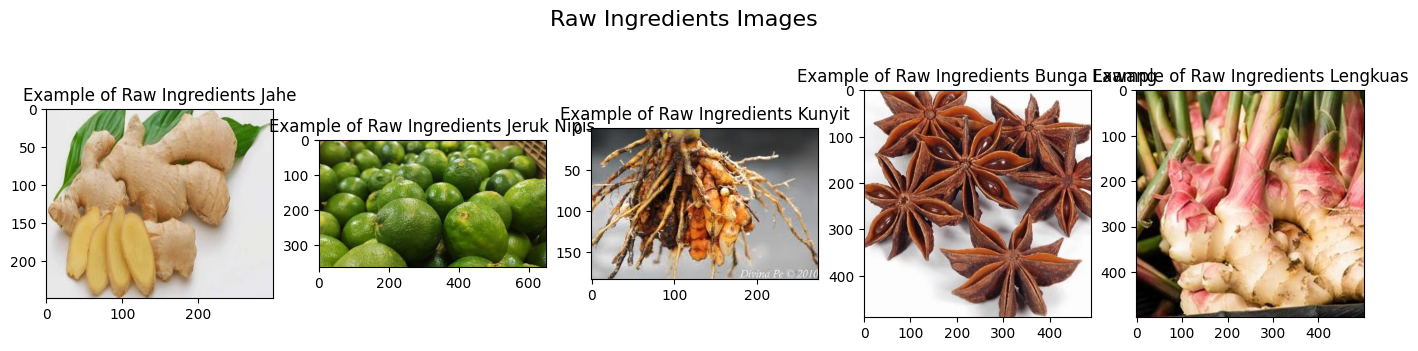

In [91]:
fig, axes = plt.subplots(1, 5, figsize=(17, 4))
fig.suptitle('Raw Ingredients Images', fontsize=16)

# Plot one image from the first 4 letters
for ii, ingredients in enumerate(['Jahe' , 'Jeruk Nipis', 'Kunyit', 'Bunga Lawang', 'Lengkuas']):
    dir = f'./data/{ingredients}'
    img = tf.keras.preprocessing.image.load_img(dir+'/'+os.listdir(dir)[0])
    axes[ii].imshow(img)
    axes[ii].set_title(f'Example of Raw Ingredients {ingredients}')

In [92]:
sample_array=tf.keras.preprocessing.image.img_to_array(img)
print(f"Each image has size: {sample_array.shape}")

Each image has size: (500, 500, 3)


In [93]:
sample_array[0,:5]

array([[72., 74., 24.],
       [72., 74., 24.],
       [72., 74., 25.],
       [72., 74., 25.],
       [70., 73., 28.]], dtype=float32)

In [94]:
#create model
def create_model():
    model=tf.keras.models.Sequential([
        tf.keras.Input(shape=(300,300,3)),
        tf.keras.layers.Rescaling(1./255),
        
        tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy'] 
    )
    return model

In [95]:
model_base=create_model()
model_base.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_17 (Rescaling)        │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_85 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_86 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 71, 71, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_87 (MaxPooling2D) │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 33, 33, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_88 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 444,261 (1.69 MB)

 Trainable params: 444,261 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
BATCH_SIZE=32
IMAGE_SIZE=(300,300)
LABEL_MODE='categorical'

# Inisiasi Dataset
train_dataset,validation_dataset=tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE,
    validation_split=0.2, #20% data untuk validasi
    subset='both',
    seed=42 
)

Found 1810 files belonging to 5 classes.
Using 1448 files for training.
Using 362 files for validation.


In [97]:
#Optimasi
SHUFFLE_BUFFER_SIZE=500
PREFETCH_BUFFER_SIZE=tf.data.AUTOTUNE

train_dataset_final=(
    train_dataset
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(PREFETCH_BUFFER_SIZE)
)

validation_dataset_final=(
    validation_dataset
    .cache()
    .prefetch(PREFETCH_BUFFER_SIZE)
)

In [98]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
       
        train_accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')
        if train_accuracy >= 0.95 and val_accuracy >= 0.85:
            self.model.stop_training = True

            print("\nReached 95% train accuracy and 85% validation accuracy, so cancelling training!")

In [99]:
#base model
base_model = create_model()

# Constant for epochs
EPOCHS = 100

# Train the model
history = base_model.fit(
      train_dataset_final,
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_dataset_final,
      callbacks = [EarlyStoppingCallback()])

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 317ms/step - accuracy: 0.3546 - loss: 1.4419 - val_accuracy: 0.5608 - val_loss: 0.9640
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 319ms/step - accuracy: 0.5918 - loss: 0.9432 - val_accuracy: 0.6188 - val_loss: 0.8435
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 290ms/step - accuracy: 0.6748 - loss: 0.7820 - val_accuracy: 0.6630 - val_loss: 0.7477
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 290ms/step - accuracy: 0.7311 - loss: 0.6879 - val_accuracy: 0.7348 - val_loss: 0.6508
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 292ms/step - accuracy: 0.7448 - loss: 0.6522 - val_accuracy: 0.7017 - val_loss: 0.6976
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 299ms/step - accuracy: 0.7911 - loss: 0.5512 - val_accuracy: 0.7459 - val_loss: 0.6206
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 297ms/step - accuracy: 0.7811 - loss: 0.5628 - val_accuracy: 0.7790 - val_loss: 0.5570
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 292ms/step - accuracy: 0.8249 - loss: 0.4617 - 

KeyboardInterrupt: 

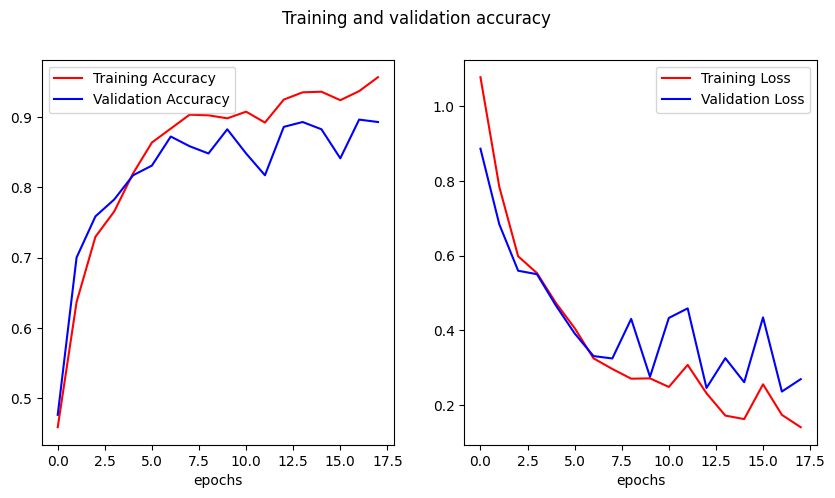

In [62]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


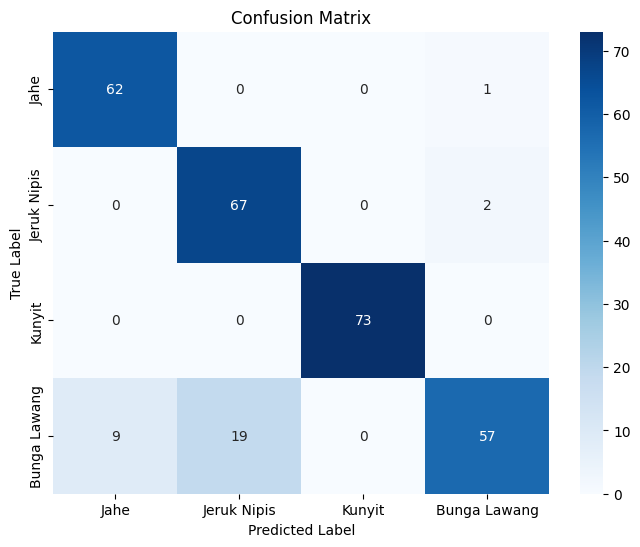

In [ ]:

# Get true labels and predictions
y_true = np.concatenate([y for x, y in validation_dataset_final], axis=0)
y_pred = base_model.predict(validation_dataset_final)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
class_names = ['Jahe', 'Jeruk Nipis', 'Kunyit', 'Bunga Lawang', 'Lengkuas']  # Labels for ingredients
plot_confusion_matrix(conf_matrix, class_names)


Augmentasi

In [67]:
FILL_MODE='nearest'

data_augmentation=tf.keras.Sequential([
    tf.keras.Input(shape=(300,300,3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.2, fill_mode=FILL_MODE)
])

In [68]:
base_model=create_model()
model_with_aug=tf.keras.models.Sequential([
    data_augmentation,
    base_model
])

model_with_aug.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [69]:
# Constant for epochs
EPOCHS = 500

# Train the model
history_aug = model_with_aug.fit(
      train_dataset_final,
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_dataset_final,
      callbacks = [EarlyStoppingCallback()])

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 482ms/step - accuracy: 0.3744 - loss: 1.2436 - val_accuracy: 0.6069 - val_loss: 0.9146
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 485ms/step - accuracy: 0.6752 - loss: 0.7846 - val_accuracy: 0.7310 - val_loss: 0.6443
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 483ms/step - accuracy: 0.8086 - loss: 0.5664 - val_accuracy: 0.8138 - val_loss: 0.5103
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 535ms/step - accuracy: 0.8304 - loss: 0.4602 - val_accuracy: 0.7759 - val_loss: 0.6525
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 455ms/step - accuracy: 0.8386 - loss: 0.4449 - val_accuracy: 0.8310 - val_loss: 0.4783
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 440ms/step - accuracy: 0.8511 - loss: 0.3914 - val_accuracy: 0.8345 - val_loss: 0.4511
Epoch 7/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 455ms/step - accuracy: 0.8304 - loss: 0.4700 - val_accuracy: 0.8379 - val_loss: 0.4274
Epoch 8/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 497ms/step - accuracy: 0.8681 - loss: 0.3865 - 

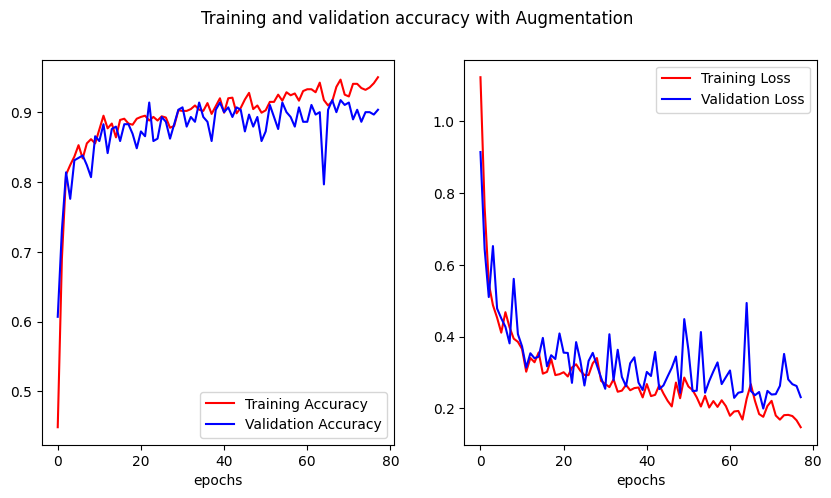

In [70]:

# Get training and validation accuracies
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy with Augmentation')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

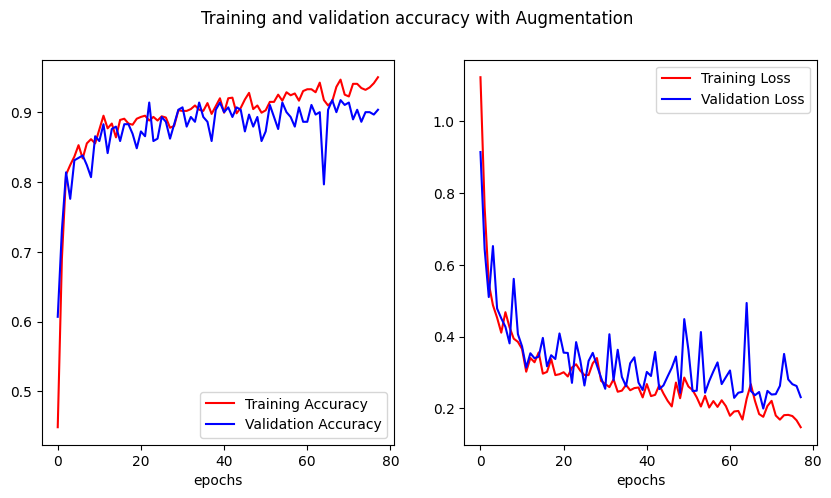

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


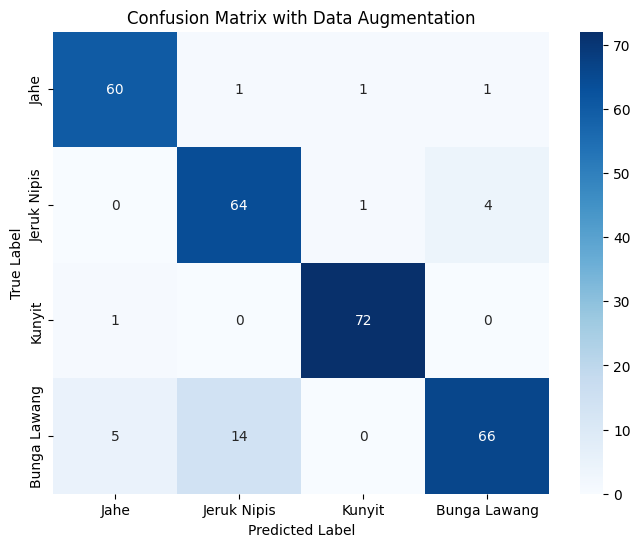

In [ ]:

# Get true labels and predictions for the augmented model
y_true_aug = np.concatenate([y for x, y in validation_dataset_final], axis=0)
y_pred_aug = model_with_aug.predict(validation_dataset_final)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)
y_true_classes_aug = np.argmax(y_true_aug, axis=1)

# Create confusion matrix for the augmented model
conf_matrix_aug = confusion_matrix(y_true_classes_aug, y_pred_classes_aug)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix with Data Augmentation')
    plt.show()

# Plot the confusion matrix with class labels
class_names = ['Jahe', 'Jeruk Nipis', 'Kunyit', 'Bunga Lawang','Lengkuas']
plot_confusion_matrix(conf_matrix_aug, class_names)

In [71]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model_with_aug.predict(image, verbose=0)[0][0]
    
    with out:
        print(prediction)
        if prediction > 0.5:
            print(filename + " is Jahe")
        elif prediction < 0.001:
            print(filename + " is Kunyit")
        elif prediction < 0.5:
            print(filename + " is Jeruk Nipis")
        
def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()